# WORD EMBEDDINGS

### Introduction

There is a famous saying by German writer Johann Wolfgang von Goethe:

"Tell me with whom you consort and I will tell you who you are..."
Goethe’s assumption is that the people you spend time with each and every day are a reflection of who you are as a person. Would you agree?

Now, what if we extend that same idea from people to words? Linguist John Rupert Firth took this step and came up with his own saying:

"You shall know a word by the company it keeps."

This idea that a word’s meaning can be understood by its context, or the words that surround it, is the basis for word embeddings. A word embedding is a representation of a word as a numeric vector, enabling us to compare and contrast how words are used and identify words that occur in similar contexts.

The applications of word embeddings include:

- entity recognition in chatbots
- sentiment analysis
- syntax parsing

Have little to no experience with vectors? Do not fear! We’ll break down word embeddings and how they relate to vectors, step-by-step, in the next few exercises with the help of the [spaCy package.](https://spacy.io/)

In [3]:
# 1 - Introduction

import spacy
from scipy.spatial.distance import cosine

# load model
nlp = spacy.load('en_core_web_sm')

# define vectors
summer_vec = nlp("summer").vector
winter_vec = nlp("winter").vector

# compare similarity
print(f"The cosine distance between the word embeddings for 'summer' and 'winter' is: {cosine(summer_vec, winter_vec)}\n")

# define vectors
mustard_vec = nlp("mustard").vector
amazing_vec = nlp("amazing").vector

# compare similarity
print(f"The cosine distance between the word embeddings for 'mustard' and 'amazing' is: {cosine(mustard_vec, amazing_vec)}\n")

# display word embeddings
print(f"'summer' in vector form: {summer_vec}")
print(f"'winter' in vector form: {winter_vec}")
print(f"'mustard' in vector form: {mustard_vec}")
print(f"'amazing' in vector form: {amazing_vec}")

The cosine distance between the word embeddings for 'summer' and 'winter' is: 0.39237111806869507

The cosine distance between the word embeddings for 'mustard' and 'amazing' is: 0.5299034714698792

'summer' in vector form: [-0.8318157  -2.2151647  -0.57679415 -0.84793913 -0.5588534   2.5544941
  3.7746449  -0.2740742   1.3965757   3.530488    3.737921   -1.751504
  0.93131256 -1.5060711  -0.72361165 -1.7292283  -0.66205114  0.8187959
 -1.3581152  -1.3551788   0.38322556  1.6685038  -0.08569658 -0.8745279
 -1.4210445   0.4004221   0.11151576 -2.2015908   2.2212172  -0.87475675
  2.3229775  -0.2094379  -0.3386406   1.2223413   2.8219352  -2.6018841
  0.17650926  0.601498   -0.39890492 -0.04405077  1.9255867   0.90723646
 -0.21758853 -5.715403    0.6810485  -0.44535857  0.7057291  -0.22795308
  0.41835082  2.170044   -0.85310227 -0.8975785  -1.3627288  -2.1076918
 -1.2898846   4.804603    0.8476316  -1.3482168   2.0821095  -0.12183607
 -0.52152115 -1.8898137  -0.43654847  1.7502657  -0.1

### 2 - Vectors

Vectors can be many things in many different fields, but ultimately they are containers of information. Depending on the size, or the dimension, of a vector, it can hold varying amounts of data.

The simplest case is a 1-dimensional vector, which stores a single number. Say we want to represent the length of a word with a vector. We can do so as follows:

"cat" ----> [3]<br>
"scrabble" ----> [8]<br>
"antidisestablishmentarianism" ----> [28]<br>

Instead of looking at these three words with our own eyes, we can compare the vectors that represent them by plotting the vectors on a number line.one-dimensional number line with vectorsWe can clearly see that the “cat” vector is much smaller than the “scrabble” vector, which is much smaller than the “antidisestablishmentarianism” vector.

Now let’s say we also want to record the number of vowels in our words, in addition to the number of letters. We can do so using a 2-dimensional vector, where the first entry is the length of the word, and the second entry is the number of vowels:

"cat" ----> [3, 1]<br>
"scrabble" ----> [8, 2]<br>
"antidisestablishmentarianism" ----> [28, 11]<br>

To help visualize these vectors, we can plot them on a two-dimensional grid, where the x-axis is the number of letters, and the y-axis is the number of vowels.two-dimensional grid with vectors

Here we can see that the vectors for “cat” and “scrabble” point to a more similar area of the grid than the vector for “antidisestablishmentarianism”. So we could argue that “cat” and “scrabble” are closer together.

While we have shown here only 1-dimensional and 2-dimensional vectors, we are able to have vectors in any number of dimensions. Even 1,000! The tricky part, however, is visualizing them.

Vectors are useful since they help us summarize information about an object using numbers. Then, using the number representation, we can make comparisons between the vector representations of different objects!

This idea is central to how word embeddings map words into vectors.

We can easily represent vectors in Python using NumPy arrays. To create a vector containing the odd numbers from 1 to 9, we can use NumPy’s .array() method:

odd_vector = np.array([1, 3, 5, 7, 9])


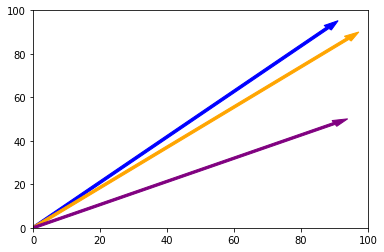

In [4]:
# 2 - Vectors

# Vectors are useful since they help us summarize information about an object using numbers and make comparisons

import numpy as np
import matplotlib.pyplot as plt

# define score vectors - student scores in First and Second Exam
scores_xavier = np.array([88, 92])
scores_niko = np.array([94, 87])
scores_alena = np.array([90, 48])

# plot vectors
try:
    plt.arrow(0, 0, scores_xavier[0], scores_xavier[1], width=1, color='blue')
except:
    pass
try:
    plt.arrow(0, 0, scores_niko[0], scores_niko[1], width=1, color='orange')
except:
    pass
try:
    plt.arrow(0, 0, scores_alena[0], scores_alena[1], width=1, color='purple')
except:
    pass
plt.axis([0, 100, 0, 100])
plt.show()

### 2 - What is a Word Embedding?

Now that you have an understanding of vectors, let’s jump back to word embeddings. Word embeddings are vector representations of a word.

They allow us to take all the information that is stored in a word, like its meaning and its part of speech, and convert it into a numeric form that is more understandable to a computer.

For example, we could look at a word embedding for the word “peace”.

[5.2907305, -4.20267, 1.6989858, -1.422668, -1.500128, ...]

Here “peace” is represented by a 96-dimension vector, with just the first five dimensions shown. Each dimension of the vector is capturing some information about how the word “peace” is used. We can also look at a word embedding for the word “war”:

[7.2966490, -0.52887750, 0.97479630, -2.9508233, -3.3934135, ...]

By converting the words “war” and “peace” into their numeric vector representations, we are able to have a computer more easily compare the vectors and understand their similarities and differences.

We can load a basic English word embedding model using spaCy as follows:

nlp = spacy.load('en')

Note: the convention is to load spaCy models into a variable named nlp.

To get the vector representation of a word, we call the model with the desired word as an argument and can use the .vector attribute.

nlp('love').vector

In [5]:
# 3.1 - Base Word Embeddings

import spacy

# load word embedding model
nlp = spacy.load('en_core_web_sm')

# define word embedding vectors
happy_vec = nlp('happy').vector
sad_vec = nlp('sad').vector
angry_vec = nlp('angry').vector

# find vector length here
happy_vec_length = len(happy_vec)
sad_vec_length = len(sad_vec)
angry_vec_length = len(angry_vec)
print(happy_vec_length)
print(sad_vec_length)
print(angry_vec_length)

96
96
96


### 4 - Distance

The key at the heart of word embeddings is distance. Before we explain why, let’s dive into how the distance between vectors can be measured.

There are a variety of ways to find the distance between vectors, and here we will cover three. The first is called Manhattan distance.

In Manhattan distance, also known as city block distance, distance is defined as the sum of the differences across each individual dimension of the vectors. Consider the vectors [1,2,3] and [2,4,6]. We can calculate the Manhattan distance between them as shown below:

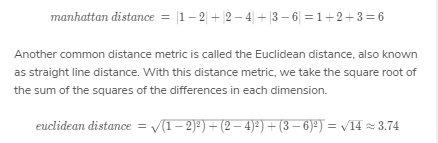

The final distance we will consider is the cosine distance. Cosine distance is concerned with the angle between two vectors, rather than by looking at the distance between the points, or ends, of the vectors. Two vectors that point in the same direction have no angle between them, and have a cosine distance of 0. Two vectors that point in opposite directions, on the other hand, have a cosine distance of 1. We would show you the calculation, but we don’t want to scare you away! For the mathematically adventurous, you can read up on the calculation [here.](https://en.wikipedia.org/wiki/Cosine_similarity#Definition)

We can easily calculate the Manhattan, Euclidean, and cosine distances between vectors using helper functions from [SciPy:](https://docs.scipy.org/doc/scipy-0.14.0/reference/index.html)

from scipy.spatial.distance import cityblock, euclidean, cosine<br>
vector_a = np.array([1,2,3])<br>
vector_b = np.array([2,4,6])
##### Manhattan distance:
manhattan_d = cityblock(vector_a,vector_b) # 6
##### Euclidean distance:
euclidean_d = euclidean(vector_a,vector_b) # 3.74
##### Cosine distance:
cosine_d = cosine(vector_a,vector_b) # 0.0

When working with vectors that have a large number of dimensions, such as word embeddings, the distances calculated by Manhattan and Euclidean distance can become rather large. Thus, calculations using cosine distance are preferred!

In [10]:
# 4 - Distance

import numpy as np
from scipy.spatial.distance import cityblock, euclidean, cosine
import spacy

# load word embedding model
nlp = spacy.load('en_core_web_sm')

# define word embedding vectors
happy_vec = nlp('happy').vector
sad_vec = nlp('sad').vector
angry_vec = nlp('angry').vector

# calculate Manhattan distance
man_happy_sad = cityblock(happy_vec ,sad_vec)
man_sad_angry = cityblock(sad_vec  ,angry_vec)
print(man_happy_sad)
print(man_sad_angry)

# calculate Euclidean distance
euc_happy_sad = euclidean(happy_vec ,sad_vec)
euc_sad_angry  = euclidean(sad_vec  ,angry_vec)
print(euc_happy_sad)
print(euc_sad_angry)

# calculate cosine distance
cos_happy_sad = cosine(happy_vec ,sad_vec)
cos_sad_angry  = cosine(sad_vec  ,angry_vec)
print(cos_happy_sad)
print(cos_sad_angry)

113.86418
118.5128
14.85196304321289
14.087335586547852
0.2744985818862915
0.23983347415924072


In [23]:
# Sample Test

import spacy
from scipy.spatial.distance import cosine

# load word embedding model
nlp = spacy.load("en_core_web_sm")

# define word embedding vectors
sponge_vec = nlp("sponge").vector
starfish_vec = nlp("starfish").vector
squid_vec = nlp("squid").vector

# compare vectors with cosine distance
dist_sponge_star = cosine(sponge_vec, starfish_vec)
dist_sponge_squid = cosine(sponge_vec, squid_vec)
dist_star_squid = cosine(starfish_vec , squid_vec)
print(dist_sponge_star)
print(dist_sponge_squid)
print(dist_star_squid)

0.25539630651474
0.40238648653030396
0.39603328704833984


### 5 - Word Embeddings Are All About Distance

The idea behind word embeddings is a theory known as the distributional hypothesis. This hypothesis states that words that co-occur in the same contexts tend to have similar meanings. With word embeddings, we map words that exist with the same context to similar places in our vector space (math-speak for the area in which our vectors exist).

The numeric values that are assigned to the vector representation of a word are not important in their own right, but gather meaning from how similar or not words are to each other.

Thus the cosine distance between words with similar contexts will be small, and the cosine distance between words that have very different contexts will be large.

The literal values of a word’s embedding have no actual meaning. We gain value in word embeddings from comparing the different word vectors and seeing how similar or different they are. Encoded in these vectors, however, is latent information about how they are used.

In [16]:
# We Dont have a Pickle File

# loaded a list of the most common 1,000 words in the English language, most_common_words, and their corresponding vector 
# representations as word embeddings, vector_list.

import spacy
from scipy.spatial.distance import cosine
from processing import most_common_words, vector_list

# print word and vector representation at index 347
print(most_common_words[347], vector_list[347])

# define find_closest_words
def find_closest_words(word_list, vector_list, word_to_check):
    return sorted(word_list,
                  key=lambda x: cosine(vector_list[word_list.index(word_to_check)], vector_list[word_list.index(x)]))[:10]

# find closest words to food
close_to_food = find_closest_words(most_common_words, vector_list, "food")
print(close_to_food)

# find closest words to summer
close_to_summer = find_closest_words(most_common_words, vector_list, "economy")
print(close_to_summer)

glass [ 1.2761219  -3.1371756   0.07517216  0.17242485  0.7104127   1.3664272
  2.5790298   0.5788313  -0.63478845  5.78517     2.9084935  -0.74030554
  2.9726825  -2.7416627   1.1808879   0.9791101   0.45854604  2.0851102
 -1.0594604  -1.6768103   0.30298102 -0.57731843 -0.741951   -2.3411913
 -1.2970599  -1.3144593   1.5624142  -4.1968927   2.520585   -1.04568
  4.327862   -0.8301592   1.4698147   1.4587566   2.3050728  -2.2208114
  3.9901233   0.19553745 -3.1022239  -0.7605516   4.663883    1.1019006
 -1.4715192  -3.5460997   2.4567857   0.02696794 -0.3081796  -1.3746904
  0.33931345  1.9631052  -1.4463401  -0.60527956 -1.7968802  -2.6089642
 -0.08648849 -0.27595782  2.4695642   0.6991825   0.02529287 -1.2947916
  0.3753165  -1.1589429  -0.38008046 -0.35974193  1.5252352  -3.7393854
  1.6384187  -1.3306148  -1.9440101   0.6836364  -2.3972218   1.1889715
  2.2445889   3.5553188  -3.0006096  -0.6541874   1.2113874  -1.259045
 -2.6270063   2.5431793  -0.412294   -2.810513   -1.8738568 

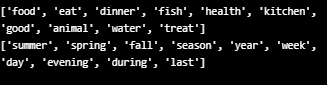

The Original was this, but we can try with other large data too

### 6 - Word2vec

You might be asking yourself a question now. How did we arrive at the vector values that define a word vector? And how do we ensure that the values chosen place the vectors for words with similar context close together and the vectors for words with different usages far apart?

Step in word2vec! Word2vec is a statistical learning algorithm that develops word embeddings from a corpus of text. Word2vec uses one of two different model architectures to come up with the values that define a collection of word embeddings.

One method is to use the continuous bag-of-words (CBOW) representation of a piece of text. The word2vec model goes through each word in the training corpus, in order, and tries to predict what word comes at each position based on applying bag-of-words to the words that surround the word in question. In this approach, the order of the words does not matter!

The other method word2vec can use to create word embeddings is continuous skip-grams. Skip-grams function similarly to n-grams, except instead of looking at groupings of n-consecutive words in a text, we can look at sequences of words that are separated by some specified distance between them.

For example, consider the sentence "The squids jump out of the suitcase". The 1-skip-2-grams includes all the bigrams (2-grams) as well as the following subsequences:

(The, jump), (squids, out), (jump, of), (out, the), (of, suitcase)

When using continuous skip-grams, the order of context is taken into consideration! Because of this, the time it takes to train the word embeddings is slower than when using continuous bag-of-words. The results, however, are often much better!

With either the continuous bag-of-words or continuous skip-grams representations as training data, word2vec then uses a shallow, 2-layer neural network to come up with the values that place words with a similar context in vectors near each other and words with different contexts in vectors far apart from each other.

Let’s take a closer look to see how continuous bag-of-words and continuous skip-grams work!

Functions:
    
get_cbows() iterates through a preprocessed sentence word by word and returns a list of the different bag-of-words representations for the context words that surround each word in the sentence.

get_skip_grams() iterates through a sentence word by word and returns an ordered list of the different context words that surround each word in the sentence.

context_length set to 2. This indicates that when finding our bag-of-words and skip-gram representations, we are only looking 2 words to the left and 2 words to the right of our word we are focusing on.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

sentence = "It was the best of times, it was the worst of times."
print(sentence)

# preprocessing
sentence_lst = [word.lower().strip(".") for word in sentence.split()]

# set context_length
#context_length = 2
context_length = 3

# function to get cbows
def get_cbows(sentence_lst, context_length):
  cbows = list()
  for i, val in enumerate(sentence_lst):
    if i < context_length:
      pass
    elif i < len(sentence_lst) - context_length:
      context = sentence_lst[i-context_length:i] + sentence_lst[i+1:i+context_length+1]
      vectorizer = CountVectorizer()
      vectorizer.fit_transform(context)
      context_no_order = vectorizer.get_feature_names()
      cbows.append((val,context_no_order))
  return cbows

# define cbows here:
cbows = get_cbows(sentence_lst, context_length)

# function to get cbows
def get_skip_grams(sentence_lst, context_length):
  skip_grams = list()
  for i, val in enumerate(sentence_lst):
    if i < context_length:
      pass
    elif i < len(sentence_lst) - context_length:
      context = sentence_lst[i-context_length:i] + sentence_lst[i+1:i+context_length+1]
      skip_grams.append((val, context))
  return skip_grams

# define skip_grams here:
skip_grams = get_skip_grams(sentence_lst, context_length)

try:
  print('\nContinuous Bag of Words')
  for cbow in cbows:
    print(cbow)
except:
  pass
try:
  print('\nSkip Grams')
  for skip_gram in skip_grams:
    print(skip_gram)
except:
  pass

It was the best of times, it was the worst of times.

Continuous Bag of Words
('best', ['it', 'of', 'the', 'times', 'was'])
('of', ['best', 'it', 'the', 'times', 'was'])
('times,', ['best', 'it', 'of', 'the', 'was'])
('it', ['best', 'of', 'the', 'times', 'was', 'worst'])
('was', ['it', 'of', 'the', 'times', 'worst'])
('the', ['it', 'of', 'times', 'was', 'worst'])

Skip Grams
('best', ['it', 'was', 'the', 'of', 'times,', 'it'])
('of', ['was', 'the', 'best', 'times,', 'it', 'was'])
('times,', ['the', 'best', 'of', 'it', 'was', 'the'])
('it', ['best', 'of', 'times,', 'was', 'the', 'worst'])
('was', ['of', 'times,', 'it', 'the', 'worst', 'of'])
('the', ['times,', 'it', 'was', 'worst', 'of', 'times'])


### 7 - Gensim

Depending on the corpus of text we select to train a word embedding model, different word embeddings will be created according to the context of the words in the given corpus. The larger and more generic a corpus, however, the more generalizable the word embeddings become.

When we want to train our own word2vec model on a corpus of text, we can use the [gensim package!](https://radimrehurek.com/gensim/)

In previous exercises, we have been using pre-trained word embedding models stored in spaCy. These models were trained, using word2vec, on blog posts and news articles collected by the [Linguistic Data Consortium at the University of Pennsylvania](https://catalog.ldc.upenn.edu/LDC2013T19). With gensim, however, we are able to build our own word embeddings on any corpus of text we like.

To easily train a word2vec model on our own corpus of text, we can use gensim’s Word2Vec() function.

model = gensim.models.Word2Vec(corpus, size=100, window=5, min_count=1, workers=2, sg=1)

- corpus is a list of lists, where each inner list is a document in the corpus and each element in the inner lists is a word token
- size determines how many dimensions our word embeddings will include. Word embeddings often have upwards of 1,000 dimensions! Here we will create vectors of 100-dimensions to keep things simple.

don’t worry about the rest of the keyword arguments here!

To view the entire vocabulary used to train the word embedding model, we can use the .wv.vocab.items() method.

vocabulary_of_model = list(model.wv.vocab.items())<br>

When we train a word2vec model on a smaller corpus of text, we pick up on the unique ways in which words of the text are used.

For example, if we were using scripts from the television show Friends as a training corpus, the model would pick up on the unique ways in which words are used in the show. While the generalized vectors in a spaCy model might not place the vectors for “Ross” and “Rachel” close together, a gensim word embedding model trained on Friends’ scrips would place the vectors for words like “Ross” and “Rachel”, two characters that have a continuous on and off-again relationship throughout the show, very close together!

To easily find which vectors gensim placed close together in its word embedding model, we can use the .most_similar() method.

model.most_similar("my_word_here", topn=100)<br>

"my_word_here" is the target word token we want to find most similar words to<br>
topn is a keyword argument that indicates how many similar word vectors we want returned<br>
One last gensim method we will explore is a rather fun one: .doesnt_match().<br>

model.doesnt_match(["asia", "mars", "pluto"])<br>

when given a list of terms in the vocabulary as an argument, .doesnt_match() returns which term is furthest from the others.
Let’s play around with gensim word2vec models to explore the word embeddings defined on our own corpus of training data!

In [21]:
# Genesim Model

import gensim
from nltk.corpus import stopwords
from romeo_juliet import romeo_and_juliet

# load stop words
stop_words = stopwords.words('english')

# preprocess text
romeo_and_juliet_processed = [[word for word in romeo_and_juliet.lower().split() if word not in stop_words]]

# view inner list of romeo_and_juliet_processed
print(romeo_and_juliet_processed[0][:20])

# train word embeddings model - gensim word2vec model of 100 dimensions
model = gensim.models.Word2Vec(romeo_and_juliet_processed, size=100, window=5, min_count=1, workers=2, sg=1)

# view vocabulary
vocabulary = list(model.wv.vocab.items())
print(vocabulary[:10])

# similar to romeo
similar_to_romeo = model.wv.most_similar("romeo", topn=20)
print(similar_to_romeo)

# one is not like the others - Odd one Out
not_star_crossed_lover = model.wv.doesnt_match(["romeo", "juliet", "mercutio"])
print(not_star_crossed_lover)

['tragedy', 'romeo', 'juliet', 'william', 'shakespeare', 'contents', 'prologue.', 'act', 'scene', 'i.', 'public', 'place.', 'scene', 'ii.', 'street.', 'scene', 'iii.', 'room', 'capulet’s', 'house.']
[('tragedy', <gensim.models.keyedvectors.Vocab object at 0x0000014BA131C828>), ('romeo', <gensim.models.keyedvectors.Vocab object at 0x0000014BA131C860>), ('juliet', <gensim.models.keyedvectors.Vocab object at 0x0000014BA131C908>), ('william', <gensim.models.keyedvectors.Vocab object at 0x0000014BA131C940>), ('shakespeare', <gensim.models.keyedvectors.Vocab object at 0x0000014BA131CA58>), ('contents', <gensim.models.keyedvectors.Vocab object at 0x0000014BA131CA90>), ('prologue.', <gensim.models.keyedvectors.Vocab object at 0x0000014BA131CAC8>), ('act', <gensim.models.keyedvectors.Vocab object at 0x0000014BA131CB00>), ('scene', <gensim.models.keyedvectors.Vocab object at 0x0000014BA131CB38>), ('i.', <gensim.models.keyedvectors.Vocab object at 0x0000014BA131CBE0>)]
[('romeo.', 0.9987674355506

### Review
Lost in a multidimensional vector space after this lesson? We hope not! We have covered a lot here, so let’s take some time to recap.

- Vectors are containers of information, and they can have anywhere from 1-dimension to hundreds or thousands of dimensions
- Word embeddings are vector representations of a word, where words with similar contexts are represented with vectors that are closer together
- spaCy is a package that enables us to view and use pre-trained word embedding models
- The distance between vectors can be calculated in many ways, and the best way for measuring the distance between higher dimensional vectors is cosine distance
- Word2Vec is a shallow neural network model that can build word embeddings using either continuous bag-of-words or continuous skip-grams
- Gensim is a package that allows us to create and train word embedding models using any corpus of text

#### Quiz:

- Word Embeddings allows us to compare and contrast how words are used and identify words that occur in similar contexts.They are also quantifiable because each is a representation of a word as a numeric vector.
- Cosine distance is generally preferred for measuring distance between word embeddings because the distance never gets larger than 1, while other distance formulas may generate extremely large numbers.
- Gensim allows you to create word embeddings based on any corpus of text, while spaCy uses a prepackaged corpus.
- Word2Vec uses one of these Continuous bag-of-words and skip-grams models to come up with the values that define a collection of word embeddings(To Generate Word Embeddings).